<a href="https://colab.research.google.com/github/amoladmane/Unsupervised-ML/blob/main/Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Machine Learning
1. K - means
2. Hierarchical


Target feature will not be for Clustering.
Main goal is categorise similar data points togecther.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Install required dependencies

In [2]:
%pip install yellowbrick plotly nbformat

## Step 1 - read dataset

In [3]:
import pandas as pd
df = pd.read_csv(' https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 2 - basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending'], dtype='object')

### Problem statement = Categorize similar customer based on Age , Income and Spending
### Is als know as Costomer Segmentation

## Step 3 - Separte X values (Age, Income, Spending)

In [7]:
X1 = df[['Age','Income', 'Spending']]
X1.head()


,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step 4 - Preprocess the data with pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pip1 = Pipeline(steps=(['impute',SimpleImputer(strategy='mean')],
                           ('scaler',StandardScaler()))).set_output(transform='pandas')

In [10]:
num_pip1

Pipeline(steps=(['impute', SimpleImputer()], ('scaler', StandardScaler())))

In [11]:
X_pre = num_pip1.fit_transform(X1)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step 5 - Next step is to find optimal number of cluster that needed

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

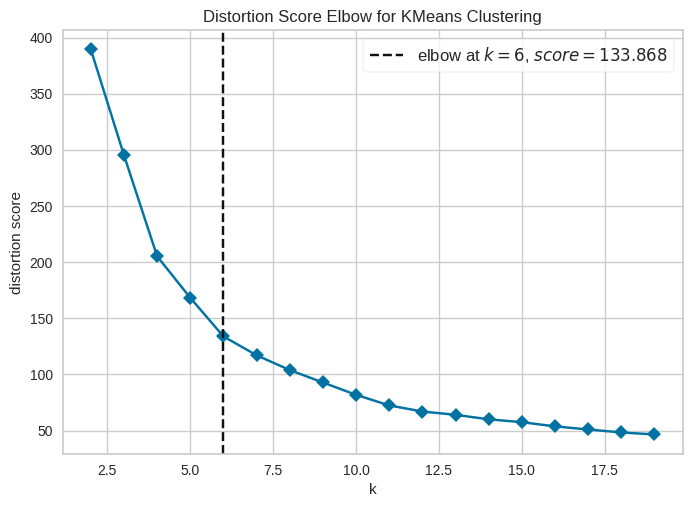

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer = KElbowVisualizer(KMeans(),
                              k=(2, 20),
                              timings=False)
visualizer.fit(X_pre)
visualizer.show()

### Based on ghraph elbow found at k=6
### Create K Means with 6 clusters

In [14]:
km_model = KMeans(n_clusters =6 )
lb1 =km_model.fit_predict(X_pre)

In [15]:
lb1

array([3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3,
       0, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 5, 1, 5, 4, 5, 4, 5, 4, 5,
       1, 5, 4, 5, 4, 5, 1, 5, 4, 5, 1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 2, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5], dtype=int32)

### Save above value in X1

In [16]:
X_lab1=X1.copy()
X_lab1['Label']=lb1

In [17]:
X_lab1

,Age,Income,Spending,Label
0,19,15,39,3
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,5
196,45,126,28,4
197,32,126,74,5
198,32,137,18,4


In [18]:
X_lab1.query("Label==0")

,Age,Income,Spending,Label
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0


In [19]:
for i in range(6):
  print(f'Label :{i}\n')
  display(X_lab1.query(f"Label=={i}"))
  print('\n=======================\n')

Label :0



,Age,Income,Spending,Label
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0




Label :1



,Age,Income,Spending,Label
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1
68,19,48,59,1
69,32,48,47,1




Label :2



,Age,Income,Spending,Label
40,65,38,35,2
46,50,40,55,2
50,49,42,52,2
53,59,43,60,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
57,69,44,46,2
59,53,46,46,2
60,70,46,56,2




Label :3



,Age,Income,Spending,Label
0,19,15,39,3
1,21,15,81,3
3,23,16,77,3
5,22,17,76,3
7,23,18,94,3
9,30,19,72,3
11,35,19,99,3
13,24,20,77,3
15,22,20,79,3
17,20,21,66,3




Label :4



,Age,Income,Spending,Label
126,43,71,35,4
128,59,71,11,4
130,47,71,9,4
134,20,73,5,4
136,44,73,7,4
140,57,75,5,4
144,25,77,12,4
146,48,77,36,4
148,34,78,22,4
150,43,78,17,4




Label :5



,Age,Income,Spending,Label
123,39,69,91,5
125,31,70,77,5
127,40,71,95,5
129,38,71,75,5
131,39,71,75,5
133,31,72,71,5
135,29,73,88,5
137,32,73,73,5
139,35,74,72,5
141,32,75,93,5


### get the centroid

In [20]:
cent1 = X_lab1.groupby(by="Label").mean(numeric_only=True)
cent1

,Age,Income,Spending
Label,,,
0,45.523810,26.285714,19.380952
1,26.684211,57.578947,47.789474
2,56.333333,54.266667,49.066667
3,25.250000,25.833333,76.916667
4,41.939394,88.939394,16.969697
5,32.692308,86.538462,82.128205


### PLot the above result

In [21]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X_lab1,
                    x = 'Age',
                    y = 'Income',
                    z = 'Spending',
                    color='Label')
fig.show()

## Hierarchical Clustering uses agglomerative Clustering

In [22]:
X_pre

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [23]:
from sklearn.cluster import AgglomerativeClustering
ag_model = AgglomerativeClustering(n_clusters=6)
lab2 = ag_model.fit_predict(X_pre)
lab2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [24]:
X_lab2=X1.copy()
X_lab2['Label']=lab2

In [25]:
X_lab2.query('Label==1')

,Age,Income,Spending,Label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


In [26]:
print('Agglomerative Clustering')
for i in range(6):
  print(f'Label : {i}\n')
  display(X_lab2.query(f"Label=={i}"))
  print('\n==================================================\n')

Agglomerative Clustering
Label : 0



,Age,Income,Spending,Label
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0




Label : 1



,Age,Income,Spending,Label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Label : 2



,Age,Income,Spending,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Label : 3



,Age,Income,Spending,Label
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3




Label : 4



,Age,Income,Spending,Label
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4




Label : 5



,Age,Income,Spending,Label
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


In [27]:
cent2 = X_lab2.groupby(by='Label').mean(numeric_only=True)
cent2

,Age,Income,Spending
Label,,,
0,27.377778,57.511111,45.844444
1,56.400000,55.288889,48.355556
2,32.692308,86.538462,82.128205
3,43.892857,91.285714,16.678571
4,44.318182,25.772727,20.272727
5,24.809524,25.619048,80.238095


In [28]:
fig2=px.scatter_3d(data_frame=X_lab2,
                   x='Age',
                   y='Income',
                   z='Spending',
                   color='Label')
fig2.show()